In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from insightface.app import FaceAnalysis

In [2]:
# configure face app
faceapp = FaceAnalysis(name='buffalo_sc',
                        root = 'insightface_model')
                        #provider=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0,det_size=(640,640),det_thresh=0.5)

## warning do not set det_thres less than 0.3

e:\FASP\attendance_system\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


### Extract facial feature

In [7]:
listdir=os.listdir(path='images')

In [8]:
print(listdir)

['student-Angelina Jolie', 'student-Chris_Evans', 'student-Scarlett Johansson', 'teacher-Barack_Obama', 'teacher-Morgan_Freeman']


In [9]:
import re           ## regular expression

In [10]:
def clean_name(string):
    ## will remove all special character form the names of students and teachers 
    string=re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [11]:
person_info = []
for folder_name in listdir:

    role,name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    #print("Role:",role,'\t','Name:',name)
    img_files = os.listdir(path=f'images/{folder_name}')
    #print(img_files)
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        #print(path)


        # read the image
        img_arr = cv2.imread(path)
        # #print(img_arr)
        # # print(img_arr)

        # # get the info
        result = faceapp.get(img_arr,max_num=1)

        # # # extract the facial features
        if len(result)>0:
            res = result[0]
            #print(res.keys())
            embedding = res['embedding']
            person_info.append([name,role,embedding])

In [12]:
# creating dataframe for better and clean display of infos.
dataframe = pd.DataFrame(person_info,columns=['Name','Role','Facial_Features'])
dataframe #store this in redis after filtering out the duplicate data

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."
5,Angelina Jolie,Student,"[0.41072488, 1.1821749, -0.9955386, -1.4014187..."
6,Angelina Jolie,Student,"[0.4228965, 2.084679, 1.0648315, -2.2739332, -..."
7,Angelina Jolie,Student,"[0.39441854, 0.844123, -0.6154812, -2.104783, ..."
8,Angelina Jolie,Student,"[1.0931159, 1.16805, -0.2896319, -2.0099528, -..."
9,Angelina Jolie,Student,"[-0.63542634, 1.7897139, 0.59832734, -3.550089..."


# INFERENCE

## Step-1 Read Image

In [13]:
# read test image
img_test= cv2.imread("test_images/test_2.jpg")
cv2.imshow('test image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Step-2 Extract Feature

In [14]:
# Using insighface model that we already loaded, 
#we are using the model to extract the face embedding
# of the test image.

res_test=faceapp.get(img_test,max_num=0)
for i,rt in enumerate(res_test):
    print('current loop = ',i)
    bbox=rt['bbox'].astype(int)
    score=int(rt['det_score']*100)
    embed_test=rt['embedding']

current loop =  0


In [16]:
#considering only one sample
len(embed_test)
# now we have to search this embedding in our dataframe

512

In [17]:
embed_test

array([ 5.12067020e-01, -2.51689935e+00, -2.89385915e-01, -1.18638611e+00,
        2.06577301e+00,  1.15599203e+00, -1.19033527e+00,  7.11790621e-02,
        1.16607463e+00, -2.54286468e-01,  1.42721102e-01,  1.57198119e+00,
       -4.87742662e-01, -4.89396691e-01, -1.25495410e+00, -4.00637537e-02,
        2.21101046e-01,  8.69037271e-01,  5.29213786e-01, -4.14103746e-01,
        1.51452851e+00, -3.58177781e-01,  2.37028456e+00,  1.03048313e+00,
       -2.97662348e-01, -2.26442528e+00,  5.28960943e-01, -2.33053699e-01,
       -9.60882604e-01,  1.24983990e+00,  1.42619824e+00, -3.09411466e-01,
        4.80960906e-01, -2.99523085e-01,  1.15957940e+00,  6.04202926e-01,
        9.68113184e-01, -3.88770163e-01,  1.43278980e+00,  4.74204659e-01,
       -2.37617087e+00,  1.49658442e+00, -3.07928860e-01,  4.14384902e-01,
        6.90509260e-01, -8.92171264e-01,  9.77691650e-01, -8.07471037e-01,
       -1.34837776e-01,  7.37762749e-02, -1.13033068e+00, -4.19014931e-01,
       -1.82697624e-02, -

In [18]:
dataframe.head()

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."


In [19]:
X_list= dataframe['Facial_Features'].tolist()
X=np.asarray(X_list)


In [20]:
X.shape

(50, 512)

In [21]:
from sklearn.metrics import pairwise

In [22]:
y=embed_test.reshape(1,-1) #reshaping the array in 1 X 512

euclidean_distance=pairwise.euclidean_distances(X,y)
manhattan_distance=pairwise.manhattan_distances(X,y)
cosine_similar=pairwise.cosine_similarity(X,y)

In [23]:
data_search=dataframe.copy()
data_search['euclidean']=euclidean_distance
data_search['manhattan']=manhattan_distance
data_search['cosine']=cosine_similar

In [27]:
data_search.head(2)

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825...",33.327427,597.604498,-0.066683
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011...",30.959387,568.310767,0.096067


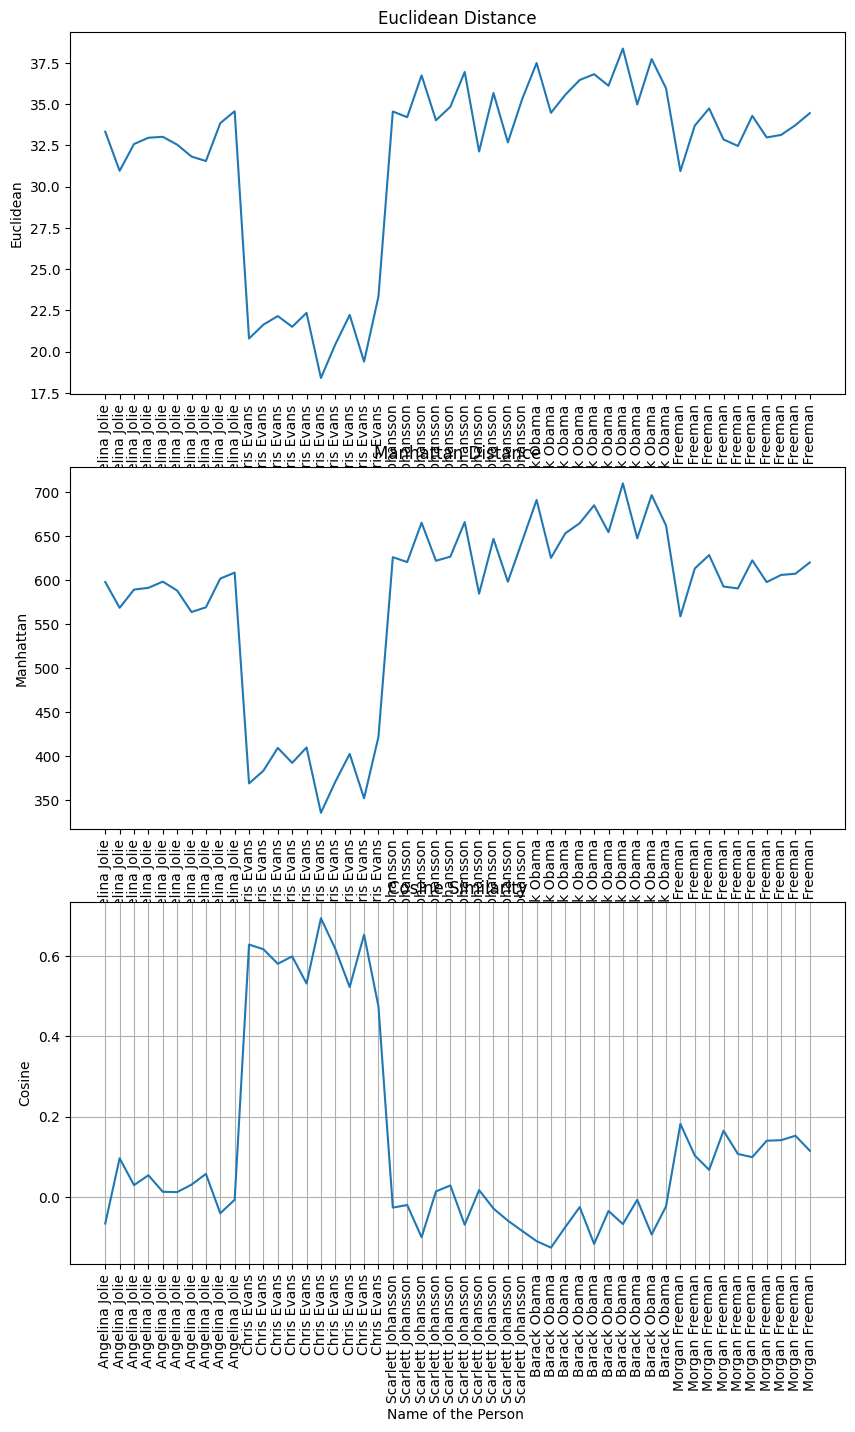

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['euclidean'])
plt.xticks(ticks=list(range(len(data_search['euclidean']))),labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person ')
plt.ylabel('Euclidean')
plt.title('Euclidean Distance')

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['manhattan']))),labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person ')
plt.ylabel('Manhattan')
plt.title('Manhattan Distance')

plt.subplot(3,1,3)
plt.plot(data_search['cosine'])
plt.xticks(ticks=list(range(len(data_search['cosine']))),labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person ')
plt.ylabel('Cosine')
plt.title('Cosine Similarity')

plt.grid()
plt.show()

## Identify the person name using euclidean distance

In [31]:
d_eq_optimal=25

In [35]:
data_filter=data_search.query(f'euclidean<{d_eq_optimal}')
data_filter.reset_index(drop=True,inplace=True) 
#print(data_filter)
if len(data_filter)>0:
    argmin= data_filter['euclidean'].argmin()
    name,role= data_filter.loc[argmin][['Name','Role']]
    #print(argmin)    
else:
    name="Unknown"
    role="Unknown"

In [24]:
print(name,role)


Chris Evans Student


## Identify the person name using Manhattan Distance

In [37]:
d_man_optimal=450
data_filter=data_search.query(f'manhattan<{d_man_optimal}')
data_filter.reset_index(drop=True,inplace=True) 
#data_filter

if len(data_filter)>0:
    argmin= data_filter['manhattan'].argmin()
    name,role= data_filter.loc[argmin][['Name','Role']]
    #print(argmin)
else:
    name="Unknown"
    role="Unknown"
#print(name,role)

In [38]:
print(name,role)

Chris Evans Student


## Identify the person name using Cosine similarity

In [39]:
s_optimal=0.5
data_filter=data_search.query(f'cosine>{s_optimal}')
data_filter.reset_index(drop=True,inplace=True) 
#print(data_filter)

if len(data_filter)>0:
    argmax= data_filter['cosine'].argmax()
    name_cos,role_cos= data_filter.loc[argmax][['Name','Role']]
    #print(argmax)
else:
    name_cos="Unknown"
    role_cos="Unknown"


In [41]:
print(name_cos,role_cos)

Chris Evans Student


## Identify multiple persons in an image

In [42]:
def ml_search_algorithm(dataframe,feature_column,test_vector,name_role=['Name','Role'],thresh=0.5):
    '''cosine similarity base search algorithm'''

# Step-1 take the dataframe 
    dataframe=dataframe.copy()

# Step-2 index face embedding from the dataframe and convert into array
    X_list=dataframe[feature_column].tolist()
    x=np.asarray(X_list)

# Step-3 Cosine similarity
    similar=pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr=np.array(similar).flatten()
    dataframe['cosine']=similar_arr
    
# Step-4 filter the data
    data_filter=dataframe.query(f'cosine>={thresh}')

    # Step-5 get the person name and role
    if len(data_filter)>0:
        data_filter.reset_index(drop=True,inplace=True)
        argmax=data_filter['cosine'].argmax()
        person_name,person_role=data_filter.loc[argmax][name_role]
    else:
        person_name="Unknown"
        person_role="Unknown"
    return person_name, person_role


In [63]:
test_image=cv2.imread(r'test_images/test_9.jpeg')
cv2.imshow('test image',test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
#Step 1 :- Take the test image and apply to insight face
results=faceapp.get(test_image)
test_copy=test_image.copy()
#Step 2:- Use for loop and extract each embedding and pass to ml_search_algorithm


for res in results:
    x1,y1,x2,y2=res['bbox'].astype(int)
    embeddings= res['embedding']
    person_name,person_role=ml_search_algorithm(dataframe_compress,
                                                'Facial_Features',
                                                test_vector=embeddings,
                                                name_role= ['Name','Role'],
                                                thresh=0.5)
    if person_name=='Unknown':
        color=(0,0,255) #bgr
    else:
        color=(0,255,0)
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    text_gen=person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.4,color,1)
cv2.imshow('test image',test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

## Compressing the dataset

In [66]:
dataframe_compress=dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress
# compressing the data and saving time.

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43242034, 1.0748498, -0.12862365, -1.833291..."
1,Barack Obama,Teacher,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
2,Chris Evans,Student,"[0.7201715, -1.4684149, -0.7781253, -1.4601073..."
3,Morgan Freeman,Teacher,"[0.48535103, -0.6192555, -0.4069932, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."


## convert the dataframe into array and save in numpy zip format

In [70]:
xvalues=dataframe_compress.values

In [68]:
col_name=np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [71]:
np.savez('dataframe_students_teachers.npz',xvalues,col_name)

In [72]:
## load the numpy zip
file_np=np.load('dataframe_students_teachers.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [73]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43242034, 1.0748498, -0.12862365, -1.833291..."
1,Barack Obama,Teacher,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
2,Chris Evans,Student,"[0.7201715, -1.4684149, -0.7781253, -1.4601073..."
3,Morgan Freeman,Teacher,"[0.48535103, -0.6192555, -0.4069932, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."
